In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data)
labels = pd.DataFrame(iris.target)

In [9]:
from random import randrange, seed
def train_valid_test_split(data, labels, testRatio =0.30, valRatio =0.30):
    X_train=pd.DataFrame(data,copy=True)
    Y_train=pd.DataFrame(labels,copy=True)
    X_test=pd.DataFrame()
    Y_test=pd.DataFrame()
    X_val=pd.DataFrame()
    Y_val=pd.DataFrame()
    ts=Y_train.size *(testRatio)
    vs=Y_train.size *(valRatio)
    #dataCopytrain=pd.DataFrame(data)
    #dataCopytest=pd.DataFrame(labels)
    while Y_test.size <ts:
        ind=randrange(Y_train.size)
        X_test = X_test.append(X_train[ind:ind+1])
        Y_test = Y_test.append(Y_train[ind:ind+1])
        X_train=X_train.drop(X_train.index[ind])
        Y_train=Y_train.drop(Y_train.index[ind])
    while Y_val.size <vs:
        ind=randrange(Y_train.size)
        X_val = X_val.append(X_train[ind:ind+1])
        Y_val = Y_val.append(Y_train[ind:ind+1])
        X_train=X_train.drop(X_train.index[ind])
        Y_train=Y_train.drop(Y_train.index[ind])
    return X_train ,Y_train,X_val,Y_val,X_test,Y_test
       
#seed(1)

X_train,Y_train,X_val,Y_val,X_test,Y_test = train_valid_test_split(data,labels)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [13]:
classifier=classifier.fit(X_train, Y_train)

d:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Selection
There is no hyperparameter to optimize in the NBC model.

However, to resolve the overfitting issue the Bayesian NBC uses smoothing parameters (e.g., var_smoothing in Gaussian NBC) that we need to tune..

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid_gnb = {'var_smoothing': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]}

gaussianNB_cv = GridSearchCV(classifier, param_grid_gnb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gaussianNB_cv.fit(X_val, Y_val)

params_optimal_gnb = gaussianNB_cv.best_params_

print("Best Score: %f" % gaussianNB_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_gnb)
print("\n")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Score: nan
Optimal Hyperparameter Values:  {'var_smoothing': 1e-09}




d:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#gaussianNB_ct = GaussianNB(**params_optimal_gnb)


In [17]:
def accuracy(y_true,y_pred,normalize=True):
    accuracy=[]
    l=len(y_pred)
    y1=pd.DataFrame(y_true)
    y2=pd.DataFrame(y_pred)
    for i in range(l):
        if (y2.iat[i,0])==(y1.iat[i,0] ):
            accuracy.append(1)
        else:
            accuracy.append(0)
    if normalize==True:
        return np.mean(accuracy)
    if normalize==False:
        return sum(accuracy)

y_train_predicted = classifier.predict(X_train)
print("Accuracy train: ",accuracy(Y_train, y_train_predicted))

Accuracy train:  0.9833333333333333


In [32]:

y_train_predicted = classifier.predict(X_train)
acc = np.sum(np.equal(Y_train[0].to_numpy(np.int64), y_train_predicted)) / len(y_train_predicted)
print("Accuracy train: ",acc)
from sklearn.metrics import accuracy_score 
print("Accuracy train: ",accuracy_score(Y_train, y_train_predicted))

Accuracy train:  0.9833333333333333
Accuracy train:  0.9833333333333333


In [34]:

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score 
print("Gaussian NB:")

y_val_predicted = gaussianNB_cv.predict(X_val)
print("Accuracy val: ",accuracy_score(Y_val, y_val_predicted))

y_test_predicted = classifier.predict(X_test)
print("Accuracy test: ",accuracy_score(Y_test, y_test_predicted))



print("\nText Confusion Matrix:")
print(confusion_matrix(Y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(Y_test, y_test_predicted))

Gaussian NB:
Accuracy val:  0.9555555555555556
Accuracy test:  0.9555555555555556

Text Confusion Matrix:
[[15  0  0]
 [ 0 14  0]
 [ 0  2 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [35]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0,
       2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2,
       1])

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test, y_pred))

Accuracy :  0.9555555555555556


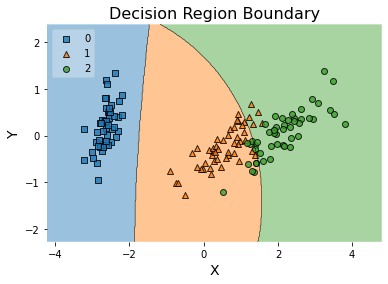

In [3]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data[:, [0,1,2,3]]
y = iris.target[:]

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X)

classifier=GaussianNB().fit(X_train2, y) 
fig, ax = plt.subplots()
value = 1.5
width = 0.75
plot_decision_regions(X_train2, y, clf=classifier,
                      filler_feature_values={0:value,1: value,2: value, 3:value},
                      filler_feature_ranges={0:width,1: width,2: width, 3: width},
                  legend=2, ax=ax)
plt.xlabel("X", size=14)
plt.ylabel("Y", size=14)
plt.title('Decision Region Boundary', size=16)
#fig.suptitle('')
plt.show()

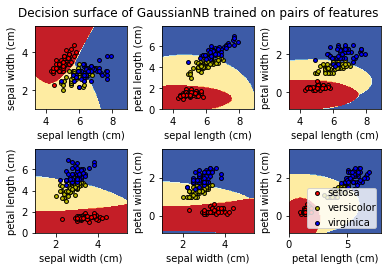

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

from sklearn.datasets import load_iris
iris3 = load_iris()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris3.data[:, pair]
    y = iris3.target

    # Train
    clf = GaussianNB().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris3.feature_names[pair[0]],
        ylabel=iris3.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris3.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of GaussianNB trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [18]:
iris = sns.load_dataset("iris")
from plotly.express import scatter_3d
# Plotting in 3D by plotly.express that would show the plot with capability of zooming,
# changing the orientation, and rotating
scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_length', size="petal_width",
                   color="species", color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre": "pink"}).show()

<AxesSubplot:xlabel='sl', ylabel='sw'>

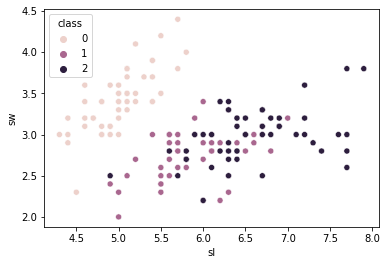

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
X_df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
y_df=pd.DataFrame(iris.target,columns=["class"])
frames = [X_df, y_df]
dra = pd.concat(frames, axis=1)
sns.scatterplot(x="sl", y="sw", hue='class', data=dra)

<AxesSubplot:xlabel='pl', ylabel='pw'>

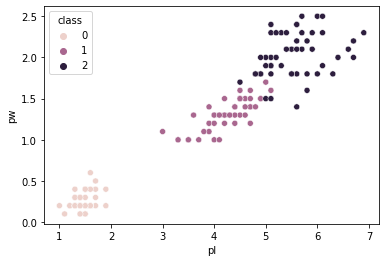

In [20]:
sns.scatterplot(x="pl", y="pw", hue='class', data=dra)

In [ ]:
"""X_train, X_test, y_train, y_test = train_test_split(train, test,
    test_size=0.15, shuffle = True, random_state = 7)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.21, random_state= 7) # 0.43 x 0.7 = 0.3"""

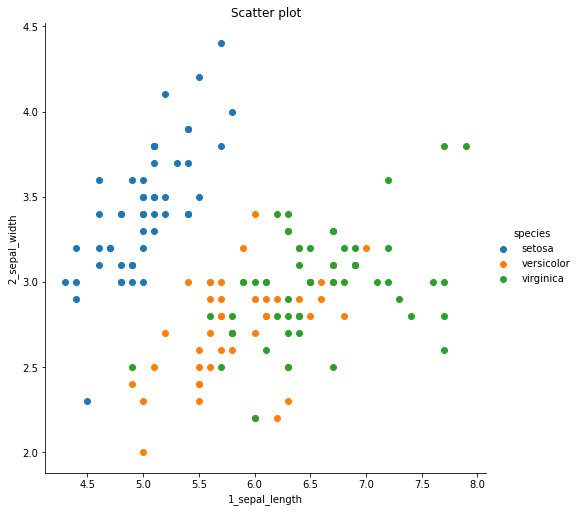

In [21]:
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

#Plot scatter of sepal 
sns.FacetGrid(iris, hue="species", height=7).map(plt.scatter,"1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

d:\anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but Gaussian

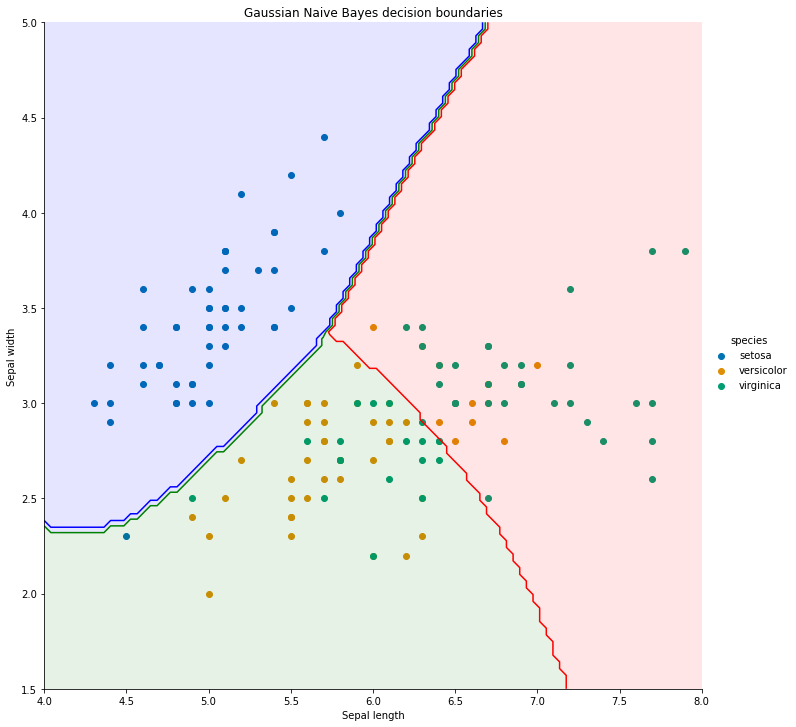

In [22]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)


# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()